In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from xgboost import XGBClassifier

In [70]:
df=sns.load_dataset('iris')

In [71]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [72]:
x = df.groupby('species').median()
x

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [73]:
duplicate_mask = df.duplicated()
print(duplicate_mask.value_counts())
df[duplicate_mask]

False    149
True       1
Name: count, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [74]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: xlabel='species', ylabel='count'>

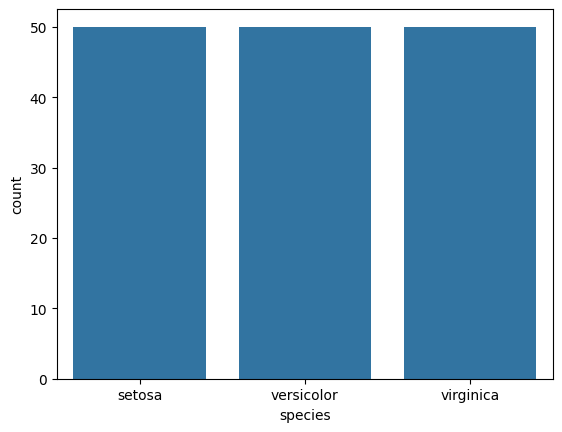

In [75]:
sns.countplot(x='species',data=df,)

<Axes: xlabel='species', ylabel='sepal_width'>

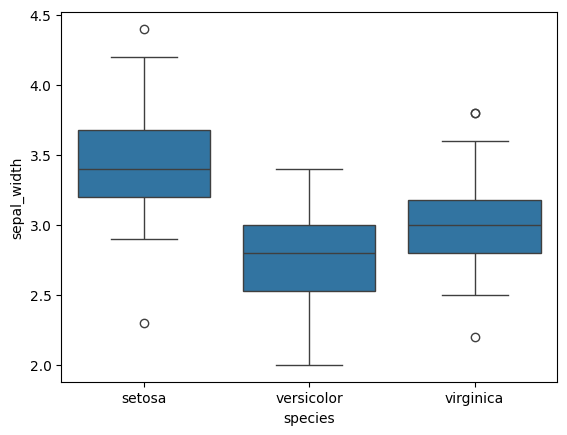

In [76]:
sns.boxplot(x='species',y='sepal_width',data=df)

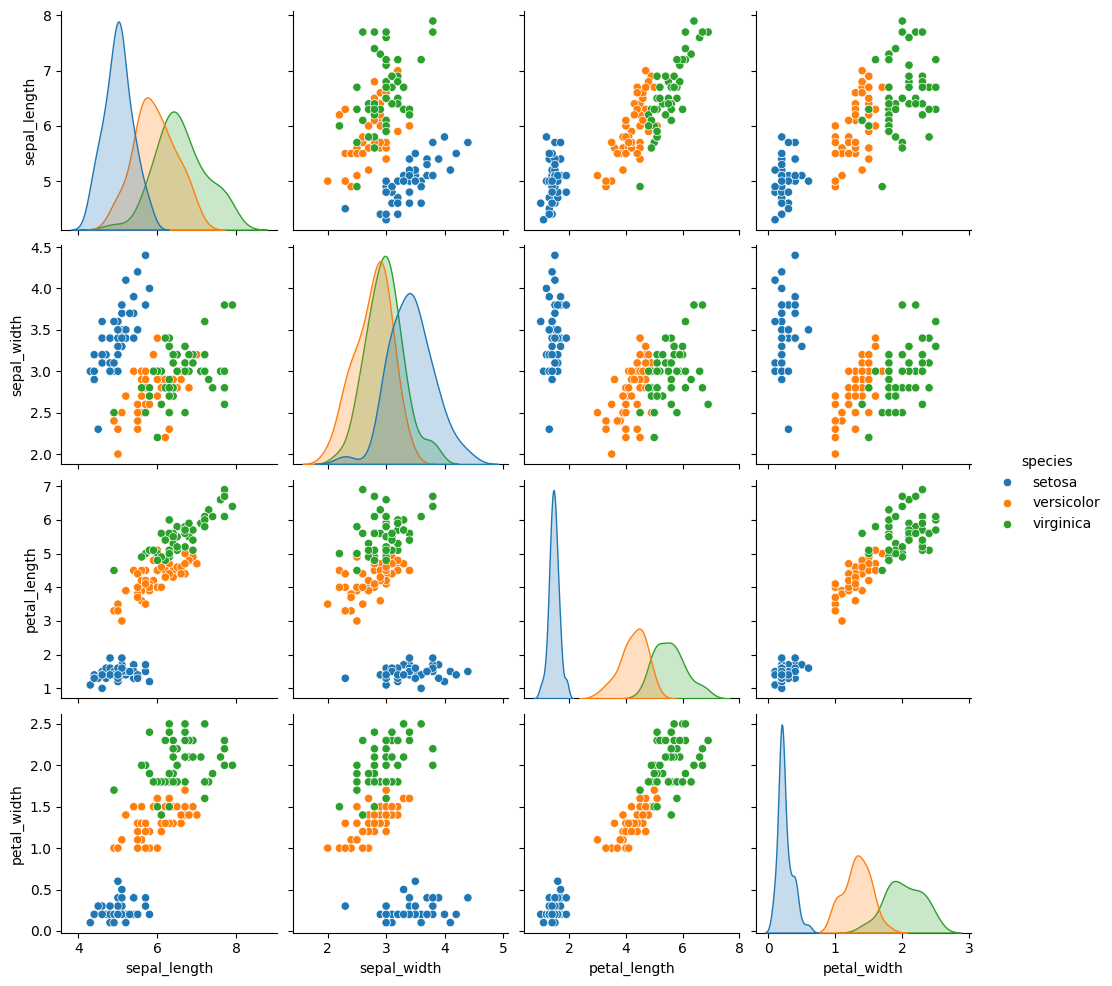

In [77]:
sns.pairplot(df, hue='species')

In [78]:
y=df['species'].replace(to_replace=['setosa','versicolor','virginica'],value=[0,1,2])
X=df.drop(columns=['species'])

C:\Users\focus\AppData\Local\Temp\ipykernel_17620\67167676.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=df['species'].replace(to_replace=['setosa','versicolor','virginica'],value=[0,1,2])


In [79]:
X_train, X_test, y_train, y_test = (
    train_test_split(
        X,
        y,
        test_size=0.2,
        shuffle=True,
    )
)

In [80]:

models = {
    'Support Vector Machine':make_pipeline(StandardScaler(),SVC()),
    'Decision Tree': tree.DecisionTreeClassifier(),
    'Logistic Regression':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'Naive Bayes': GaussianNB(),
    'Random Forest': make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=150)),
    'Gradient Boosting':GradientBoostingClassifier(n_estimators=100, learning_rate=0.01,max_depth=6, random_state=0),
    'Extreme Boosting':XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.01, objective='multi:softprob')
}

metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
}




              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93         7

    accuracy        

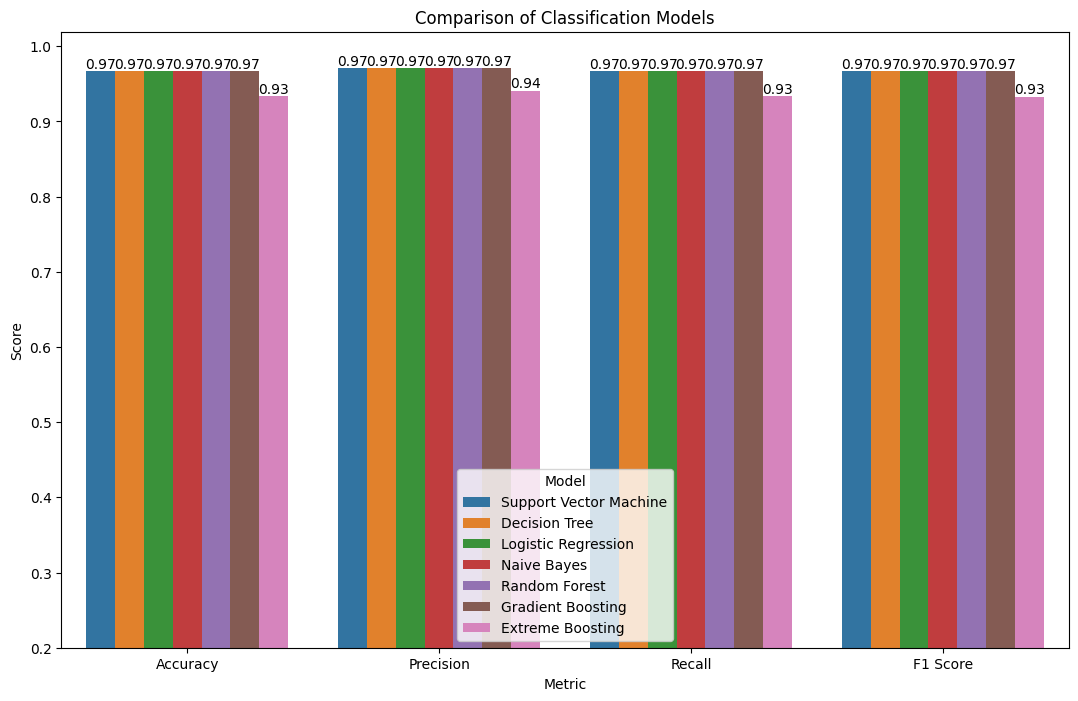

In [83]:
from sklearn.metrics import classification_report


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')
    print(classification_report(y_test, y_pred))
    # metrics['Confusion Matrix'].append(confusion_matrix(y_test, y_pred))
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)


metrics_df = pd.DataFrame(metrics)

metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision','Recall','F1 Score'], var_name='Metric', value_name='Value')

plt.figure(figsize=(13, 8))
bars = sns.barplot(data=metrics_melted, x='Metric', y='Value', hue='Model')
for container in bars.containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge')
plt.title('Comparison of Classification Models')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(bottom=0.2)
plt.legend(title='Model',loc='lower center')
plt.show()

In [82]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machine,0.966667,0.970833,0.966667,0.967160
1,Decision Tree,0.966667,0.970833,0.966667,0.967160
2,Logistic Regression,0.966667,0.970833,0.966667,0.967160
3,Naive Bayes,0.966667,0.970833,0.966667,0.967160
4,Random Forest,0.966667,0.970833,0.966667,0.967160
5,Gradient Boosting,0.966667,0.970833,0.966667,0.967160
6,Extreme Boosting,0.933333,0.940833,0.933333,0.932758
